#  A cool SYNTH - bits, pieces and some demos

## Components

### Signal generators

#### SINE (freq)

#### NOISE (white)

#### RECT (period, duty cycle)
#### SAWTOOTH (width)
#### TRIANGLE (width)


### Envelopes

#### ADSR (attack delay sustain release)

### Filters

#### LP / HP / BP / BN - ORDER [IIR?]

### LFO (low frequency oscillation)

In [168]:
# Import relevant packages
import numpy as np
import scipy.signal as signal
import matplotlib.pylab as plt
from scipy.io.wavfile import write

# And some parameters
fs = 44100
T = 5


In [ ]:
# Some function definitions

def sine(f, T, fs):
    s = np.sin(2*f*np.pi*np.arange(1/fs,T, 1/fs))
    return s

def rect(duty, per, T, fs):
    r = np.zeros(T*fs)
    idx_increment = per*fs
    idx_on = 0
    while idx_on < T*fs:
        r[idx_on:idx_on+int((duty*idx_increment))-1] = 1
        idx_on += int(idx_increment)
    return r

def sawtooth(per, T, fs):
    s = np.zeros(T*fs)
    idx_increment = int(per*fs)
    idx_start = 0
    idx_half_increment = int(idx_increment/2)
    while idx_start < T*fs:
        #idx_start = int(np.ceil(idx_on))
        idx_half = int(np.floor(idx_start+idx_half_increment))
        idx_stop = int(np.floor(idx_start + idx_increment))

        #print(idx_start)
        #print(idx_half)
        #print(idx_stop)
        print(idx_stop-idx_start)

        s[idx_start:idx_half] = np.arange(0,idx_half-idx_start)/idx_half_increment
        s[idx_half+1:idx_stop] = np.arange(0, idx_stop-(idx_half+1))/idx_half_increment
        
        idx_start += idx_stop+1
        #print(idx_on)
    return s


def triangle(per, T, fs):
    t = np.zeros(T*fs)
    idx_increment = int(np.floor((per*fs)))
    idx_on = 0
    while idx_on < T*fs:
        t[idx_on:idx_on+idx_increment] = np.arange(0,idx_increment)/idx_increment
        idx_on += int(idx_increment)
        print(idx_on)
    return t


# Helper function for wav export
def normalize4wav(sig):
    amplitude = np.iinfo(np.int16).max
    sig = sig/np.max(sig)*amplitude
    return sig


44
44
44
44
44
44
44
44
44
44
44
44
44


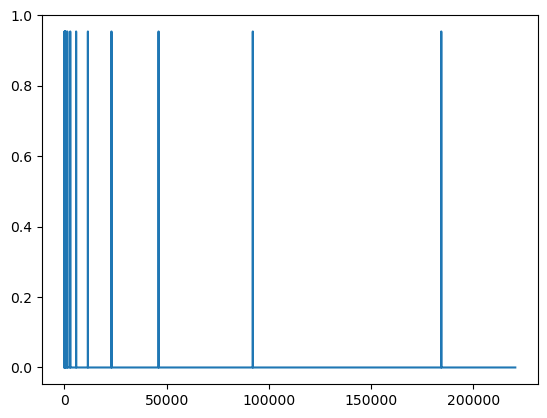

In [170]:
# some debugging


#sine_freq = 5
#s = sine(sine_freq, T, fs)
#plt.plot(s)


#rect_duty = .1
#rect_per = 10e-3
#r = rect(rect_duty, rect_per, T, fs)
#r_scale = normalize4wav(r)
#plt.plot(r)
#fname = ('../../wav/rect_duty' + str(rect_duty) + '_rect_per' + str(rect_per) + '.wav')
#write(fname, fs, np.int16(r_scale))


# sawtooth
saw_per = 1e-3
saw = sawtooth(saw_per, T, fs)
saw_scale = normalize4wav(saw)
plt.plot(saw)
fname = ('../../wav/saw_per' + str(saw_per) + '.wav')
write(fname, fs, np.int16(saw_scale))
